## 介绍



## 导入数据

第一步需要引入必要的包

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import jieba

%matplotlib inline

导入数据文件 `items.csv`, 并命名为`jobs`

In [6]:
file_name = 'data/test2.csv'
jobs = pd.read_csv(file_name); jobs.head(1)

,comp_id,salary,job_req,job_id,salary_min,comp_detail,job_desp,experience,salary_max,comp_name,address,comp_size,education,job_title
0,https://www.liepin.com/company/9352146/,18-36万,\n硕士及以上 1年以上经验\n语言不限 年龄不限\n,https://www.liepin.com/job/1911117666.shtml,18.0,NaN,职责描述：利用机器学习/深度学习的技术进行图像处理，语义理解，情感分析等的算法和系统研发；任...,1年以上经验,36.0,上海络策网络科技有限公司,公司地址：斜土路2899甲号光启文化广场Ａ幢1102室,公司规模：1-49人,硕士及以上,机器视觉深度学习工程师


## 处理数据

按顺序保留如下列，存入新的变量`n_jobs`中：

```
['job_id', 'job_title','comp_name','comp_size','address','salary_min','salary_max','experience','education','job_desp']

```

In [7]:
n_jobs = jobs[['job_id', 'job_title','comp_name','comp_size','address','salary_min','salary_max','experience','education','job_desp']]

接下来的数据处理：
- 将`experience`需要的工作年限变为数值型
- 新增一列为平均工资，从最小和最大工资计算得出

讲道理，对于薪水而言，常识上有如下影响信息：
- experience 工作经验，工作2～3年的人往往比没有经验的新人更有吸引力
- job_desp 掌握的技能要求或者工作内容的要求越复杂，薪水越好。因为更复杂的工作内容需要有能力的人
- comp_size 公司规模，大公司有实力开出很好的薪水以吸引更多人才
- job title也有关系，比如机器学习科学家、机器学习专家肯定比机器学习开发工资高吧
- address 公司的位置也有关系，比如陆家嘴位置的公司，经济实力肯定也很强，太偏的地方员工也不愿意去
- education 学历要求，要求研究生以及以上的公司，门槛就有了，工资肯定有吸引力才行

总结一下，就是个人实力（工作经验，掌握的技能、教育背景）和公司实力（公司规模、公司位置、发布职位要求）综合决定了薪水的多少。以上都是定性的常识上的猜测，具体情况如何，有没有反转的情况的发生还得结合具体数据分析。



对此，有如下问题值得分析：

- 分析下工作年限需要的分布
- 分析下工作年限跟薪水之间的关系
- 分析下工作职责描述中提到最多的技能项
- 对于发布职位的公司，在地理上如何分布？是不是可以做一个类似于房价地图的魔都薪水地图？

In [8]:
def changeExp(x):
    pt_s = '(\d+)年以上经验'
    pt = re.compile(pt_s)
    if pt.match(x):
        gg = pt.search(x)
        return int(gg.group(1))
    elif x == '经验不限':
        return 0
    else:
        x = Null
        
n_jobs['experience'] = n_jobs['experience'].apply(changeExp);
n_jobs = n_jobs.set_index('job_id')
n_jobs.head(1)

C:\anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,job_title,comp_name,comp_size,address,salary_min,salary_max,experience,education,job_desp
job_id,,,,,,,,,
https://www.liepin.com/job/1911117666.shtml,机器视觉深度学习工程师,上海络策网络科技有限公司,公司规模：1-49人,公司地址：斜土路2899甲号光启文化广场Ａ幢1102室,18.0,36.0,1,硕士及以上,职责描述：利用机器学习/深度学习的技术进行图像处理，语义理解，情感分析等的算法和系统研发；任...


#### 计算平均工资

In [10]:
n_jobs['salary_avg'] = n_jobs[['salary_min', 'salary_max']].mean(axis=1)
n_jobs.head(100)

,job_title,comp_name,comp_size,address,salary_min,salary_max,experience,education,job_desp,salary_avg
job_id,,,,,,,,,,
https://www.liepin.com/job/1911117666.shtml,机器视觉深度学习工程师,上海络策网络科技有限公司,公司规模：1-49人,公司地址：斜土路2899甲号光启文化广场Ａ幢1102室,18.0,36.0,1,硕士及以上,职责描述：利用机器学习/深度学习的技术进行图像处理，语义理解，情感分析等的算法和系统研发；任...,27.0
https://www.liepin.com/job/1911117395.shtml,机器学习工程师,上海络策网络科技有限公司,公司规模：1-49人,公司地址：斜土路2899甲号光启文化广场Ａ幢1102室,18.0,36.0,1,硕士及以上,职责描述：利用机器学习/深度学习的技术进行图像处理，语义理解，情感分析等的算法和系统研发；任...,27.0
https://www.liepin.com/a/8395222.shtml,算法工程师（数据挖掘/机器学习）,NaN,NaN,NaN,30.0,60.0,2,硕士及以上,\r\n 岗位职责：1.建立统计分析模型，通过数据挖掘与机器学习...,45.0
https://www.liepin.com/a/10285743.shtml,机器学习科学家,NaN,NaN,NaN,30.0,60.0,2,学历不限,\r\n 岗位职责1.支持业务线建模2.追踪业内先进算法，思想，...,45.0
https://www.liepin.com/a/10277195.shtml,算法工程师/机器学习研究员,NaN,NaN,NaN,40.0,70.0,2,统招本科,\r\n 岗位职责：1.负责智能供应链模型体系的搭建和优化，用前...,55.0
https://www.liepin.com/a/10257493.shtml,机器学习工程师,NaN,NaN,NaN,30.0,60.0,1,学历不限,\r\n 岗位职责：1. 与数据组协作完成核心接口的定义、使用、...,45.0
https://www.liepin.com/a/10292319.shtml,机器学习算法工程师,NaN,NaN,NaN,30.0,60.0,3,本科及以上,\r\n 1. 针对车业务需求提出合适的算法解决方案，推动该方案...,45.0
https://www.liepin.com/job/194343026.shtml,机器学习研发工程师,竹间智能,公司规模：100-499人,公司地址：上海市徐汇区宜山路700号普天软件园B2栋20楼,NaN,NaN,0,硕士及以上,你对人工智能有热诚吗？愿意接受最前沿的技术开发的挑战吗？我们在找寻人工智能方面的牛人在深度学...,NaN
https://www.liepin.com/a/10261773.shtml,机器学习科学家,NaN,NaN,NaN,30.0,60.0,5,学历不限,\r\n 岗位职责1.支持业务线建模2.追踪业内先进算法，思想，...,45.0


### 从数据本身来看

使用 describe 函数，查看数据的大致情况。

首先分析，数据的类型，比如是离散or连续的，数值or字符型等等。

#### 数据基本情况

In [28]:
n_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, https://www.liepin.com/job/1911117666.shtml to https://www.liepin.com/a/9979176.shtml
Data columns (total 9 columns):
job_title     1874 non-null object
comp_name     580 non-null object
comp_size     580 non-null object
salary_min    1687 non-null float64
salary_max    1687 non-null float64
experience    1874 non-null int64
education     1874 non-null object
job_desp      1874 non-null object
salary_avg    1687 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 146.4+ KB


可以得出一些初步事实：
- 数据有 1874条
- 其中非猎头的职位信息有580条
- 给出具体薪资水平有 1687条，其余是面谈
- 全都给出了经验要求、学历和职责描述

In [30]:
n_jobs.describe(include=['O'])

,job_title,comp_name,comp_size,education,job_desp
count,1874,580,580,1874,1874
unique,1175,208,8,6,1765
top,算法工程师,韩领科技,公司规模：100-499人,统招本科,职责描述：利用机器学习/深度学习的技术进行图像处理，语义理解，情感分析等的算法和系统研发；任...
freq,103,40,248,643,7


得出一些初步结果：
- 算法工程师，也就是说做机器学习的title在公司中大多为算法工程师
- 发布工作最多的公司是 韩领科技，有40条记录
- 其中公司规模，绝大多数为100-499人，约占了一半
- 对求职者学历要求，最常见的是统招本科，占了约1/3

In [31]:
n_jobs.describe()

,salary_min,salary_max,experience,salary_avg
count,1687.000000,1687.000000,1874.000000,1687.000000
mean,39.646117,64.169532,3.234258,51.907825
std,26.459147,32.454855,1.811183,29.241057
min,10.000000,13.000000,0.000000,12.000000
25%,25.000000,45.000000,2.000000,35.000000
50%,30.000000,60.000000,3.000000,45.000000
75%,50.000000,75.000000,5.000000,62.500000
max,400.000000,460.000000,12.000000,430.000000


得出初步结论：
- 对机器学习方向的工作经验，平均要求是3年
- 薪水范围，最少的有10w, 50%起薪是30w
- 起薪范围最大值50%在60w

### 画图分析数据

#### 工作年限的需求分布

Text(0,0.5,u'Count')

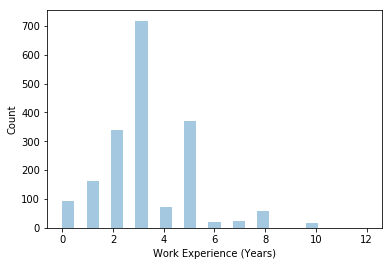

In [32]:
ax = sns.distplot(n_jobs['experience'], norm_hist=False, kde=False)
ax.set_xlabel('Work Experience (Years)')
ax.set_ylabel(u'Count')


工作年限跟薪水的关系

In [33]:
salary_exp = n_jobs.groupby('experience').mean().reset_index()

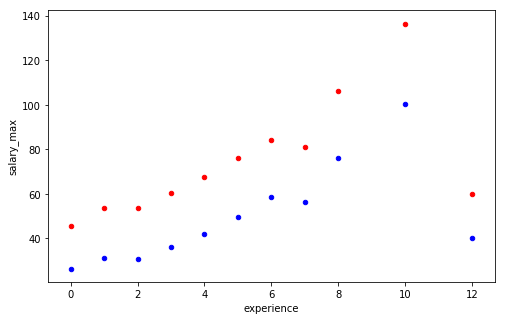

In [34]:
ax = salary_exp.plot( kind='scatter',x='experience',   y='salary_min', color='b', figsize=(8,5) )
salary_exp.plot(kind='scatter',x='experience',  y='salary_max', color='r', ax = ax)

plt.show()
